In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from refnx.reflect import Structure, ReflectModel, SLD, Slab
from refnx.analysis import Parameter, Parameters, PDF, CurveFitter, Objective, Transform
from refnx.dataset import Data1D

In [2]:
from maxent_general import MaxEnt

In [3]:
q = np.linspace(0.007, 0.3, 201)

In [101]:
air = SLD(0)
si = SLD(2.07)
sio2 = SLD(3.47)
d2o = SLD(6.36)
polymer = SLD(1.0)

In [182]:
s_slab = si | sio2(10, 3) | polymer(200, 3) | d2o(0, 3)
s_slab[1].thick.setp(vary=True, bounds=(5, 25))
s_slab[1].rough.setp(vary=True, bounds=(1, 5))
sio2.real.setp(vary=True, bounds=(3, 4))

s_slab[2].thick.setp(vary=True, bounds=(10, 250))
polymer.real.setp(vary=True, bounds=(0.2, 2.0))
s_slab[-1].rough.setp(vary=True, bounds=(1, 5))
# sim_struct.plot()
# r = sim_struct.reflectivity(q)

In [183]:
data = Data1D("e361r.txt")

In [184]:
model_slab = ReflectModel(s_slab)
model_slab.bkg.setp(vary=True, bounds=(1e-5, 4e-5))
objective_slab = Objective(model_slab, data, transform=Transform("logY"))
fitter = CurveFitter(objective_slab)
fitter.fit();

12it [00:00, 37.74it/s]


(<Figure size 432x288 with 1 Axes>, <Axes: >)

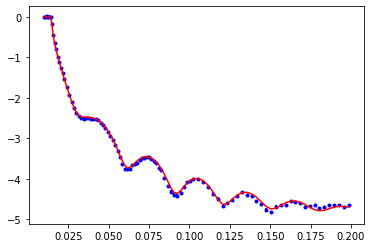

In [185]:
objective_slab.plot()

In [172]:
dist = beta(0.7, 400)
alpha = Parameter(0.5, "alpha", vary=True)
alpha.bounds = PDF(dist)

slab_thickness = Parameter(5.0, vary=False, bounds=(0.2, 10))
me = MaxEnt(60, slab_thickness, 0.0, 6.36, 1, alpha)

In [173]:
s = si | me | d2o
s.contract = 1

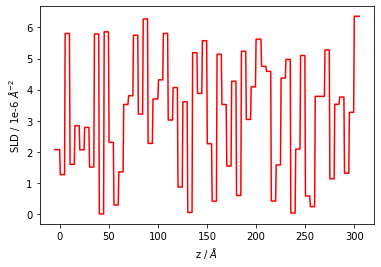

In [174]:
s.plot();

In [175]:
model = ReflectModel(s, bkg=2e-5, dq=0)
model.bkg.setp(vary=True, bounds=(1e-5, 4e-5))
objective = Objective(model, simulated, transform=Transform("logY"))

(<Figure size 432x288 with 1 Axes>, <Axes: >)

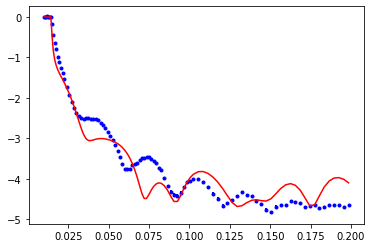

In [176]:
objective.plot()

In [177]:
fitter = CurveFitter(objective)

In [178]:
fitter.fit("differential_evolution", target="nlpost", popsize=10)

343it [04:32,  1.31it/s]/Users/anz/Documents/Andy/programming/refnx-models/MaxEntVFP/maxent_general.py:122: RuntimeWarning: divide by zero encountered in log
  S = np.sum((vf - self.mj) - vf*np.log(vf / self.mj))
/Users/anz/Documents/Andy/programming/refnx-models/MaxEntVFP/maxent_general.py:122: RuntimeWarning: invalid value encountered in multiply
  S = np.sum((vf - self.mj) - vf*np.log(vf / self.mj))
343it [04:32,  1.26it/s]


LinAlgError: The following Parameters have no effect on Objective.residuals, please consider fixing them.
[Parameter(value=0.011206427712770363, name='alpha', vary=True, bounds=PDF(<scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8ade7ba490>), constraint=None)]

In [179]:
print(objective)

________________________________________________________________________________
Objective - 140234380213600
Dataset = e361r
datapoints = 99
chi2 = 1379.5558912617826
Weighted = True
Transform = Transform('logY')
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=1.78285e-05          , bounds=[1e-05, 4e-05]>
<Parameter:'dq - resolution', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'q_offset'   , value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:       ''       
<Parameter:  ' - thick'   , value=0 (fixed)  , bounds=[-inf,

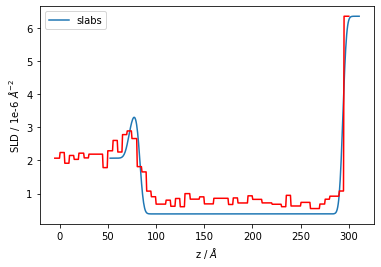

In [199]:
s.plot()
z, sld = s_slab.sld_profile()
plt.plot(z + 72, sld, label="slabs")
plt.legend();

(<Figure size 432x288 with 1 Axes>, <Axes: >)

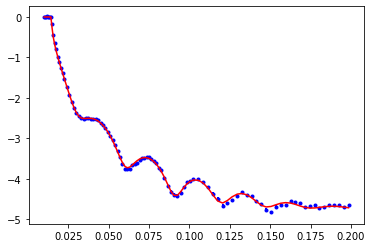

In [146]:
objective.plot()